<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/regression_%EC%8B%A4%ED%97%98%EC%9A%A9_mini_model_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
corr

In [0]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


<Figure size 1080x216 with 0 Axes>

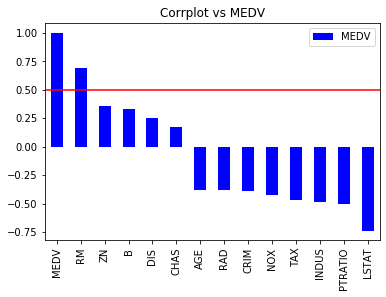

In [0]:
corr = df.corr()

plt.subplots(1,0,figsize = (15,3))
corr['MEDV'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('Corrplot vs MEDV')
plt.show()

In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'indus - medv')

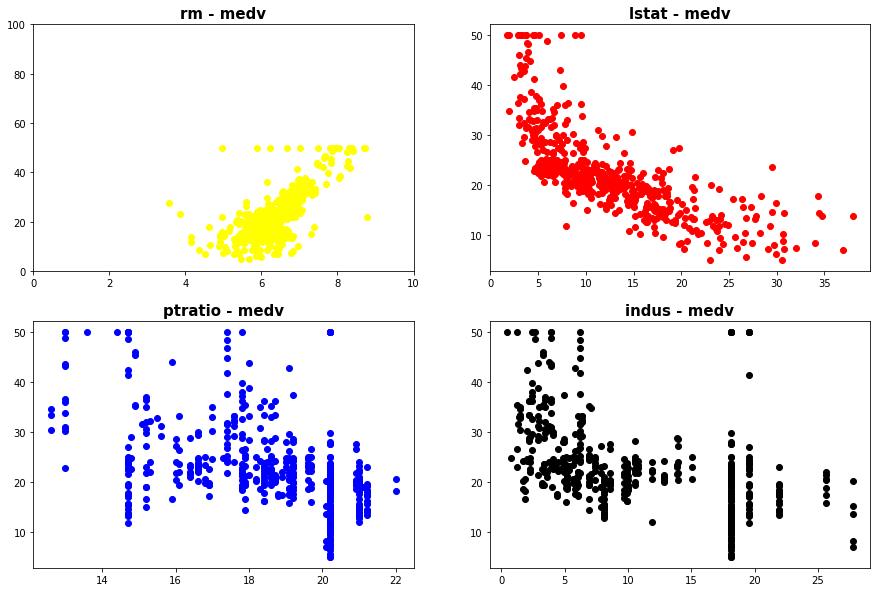

In [0]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_xlim([0,10])
ax1.set_ylim([0,100])
plt.scatter(x = df['RM'], y = df['MEDV'], color = ('yellow'))
plt.title('rm - medv', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x = df['LSTAT'], y = df['MEDV'], color = ('red'))
plt.title('lstat - medv', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(1,0))
plt.scatter(x = df['PTRATIO'], y = df['MEDV'], color = ('blue'))
plt.title('ptratio - medv', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x = df['INDUS'], y = df['MEDV'], color = ('black'))
plt.title('indus - medv', fontsize = 15, weight = 'bold')

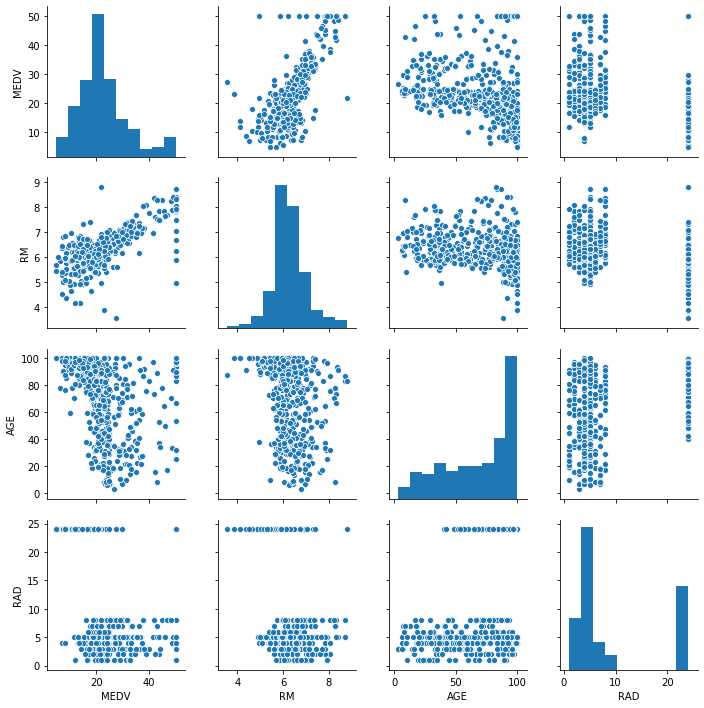

In [0]:
cols = ["MEDV", "RM", "AGE", "RAD"]
sns.pairplot(df[cols])
plt.show()

In [0]:
#다 뺴고 그냥 돌려 보기 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.3)

train_y = train['MEDV']
train_x = train.drop(['MEDV'],axis=1)
test_y = test['MEDV']
test_x = test.drop(['MEDV'],axis=1)



In [0]:
lr = LinearRegression()
lr.fit(train_x, train_y)

pred = lr.predict(test_x)

mse = np.mean((pred - test_y)**2)

print(mse)

24.366193220905785


In [0]:
df['BadGuy'] = (df['LSTAT'] +df['B'])*0.5

<Figure size 1080x216 with 0 Axes>

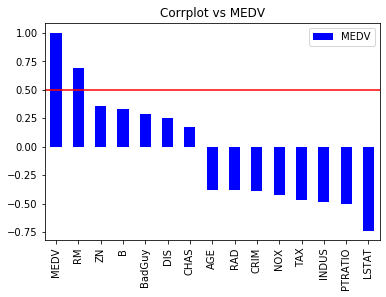

In [0]:
corr = df.corr()

plt.subplots(1,0,figsize = (15,3))
corr['MEDV'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('Corrplot vs MEDV')
plt.show()

In [0]:
df['Advantage_distance'] = (df['RAD'] + df['DIS'] - df['AGE'])*0.333

<Figure size 1080x216 with 0 Axes>

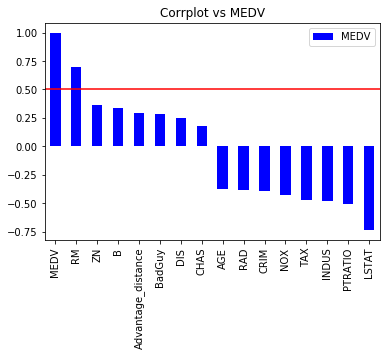

In [0]:
corr = df.corr()

plt.subplots(1,0,figsize = (15,3))
corr['MEDV'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('Corrplot vs MEDV')
plt.show()

In [0]:
df['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

In [0]:
df['B']=np.log1p(df['B'])

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BadGuy,Advantage_distance
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,5.986201,4.98,24.0,200.940,-20.016630
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,5.986201,9.14,21.6,203.020,-23.953656
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,5.975919,4.03,34.7,198.430,-18.026256
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,5.980479,2.94,33.4,198.785,-12.233687
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.986201,5.33,36.2,201.115,-15.030887


In [0]:
df['BadGuy']=np.log1p(df['BadGuy'])

In [0]:
from sklearn import preprocessing

x=df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled  = min_max_scaler.fit_transform(x)

df= pd.DataFrame(x_scaled,columns=df.columns)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BadGuy,Advantage_distance
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.976846,0.332319
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.979868,0.218272
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.998199,0.063466,0.660000,0.973158,0.389975
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.998998,0.033389,0.631111,0.973682,0.557773
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.977101,0.476744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.997825,0.219095,0.386667,0.976685,0.279155
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.979824,0.204000
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.977327,0.064901
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.998475,0.131071,0.377778,0.975419,0.083435


<Figure size 1080x216 with 0 Axes>

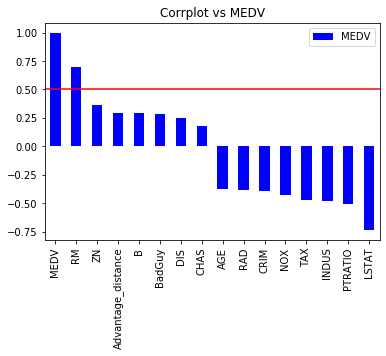

In [0]:
corr = df.corr()

plt.subplots(1,0,figsize = (15,3))
corr['MEDV'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('Corrplot vs MEDV')
plt.show()

In [0]:
#정규화 시켜서 돌려보기
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.3)

train_y = train['MEDV']
train_x = train.drop(['MEDV'],axis=1)
test_y = test['MEDV']
test_x = test.drop(['MEDV'],axis=1)

lr = LinearRegression()
lr.fit(train_x, train_y)

pred = lr.predict(test_x)

mse = np.mean((pred - test_y)**2)

print(mse)

0.011844861827872697


In [0]:
# 가장 낮은  corr 값 빼고 돌려 보기 
df.drop(['CHAS'],axis=1)

train,test = train_test_split(df,test_size=0.3)

train_y = train['MEDV']
train_x = train.drop(['MEDV'],axis=1)
test_y = test['MEDV']
test_x = test.drop(['MEDV'],axis=1)

lr = LinearRegression()
lr.fit(train_x, train_y)

pred = lr.predict(test_x)

mse = np.mean((pred - test_y)**2)

print(mse)

#더 나아짐 겉절이 값들은 빼는게 맞음 

0.013311786560446515


In [0]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
tree.fit(train_x, train_y)
print("훈련 세트 정확도: {:.3f}".format(tree.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(test_x, test_y)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.780


In [0]:
#결정트리의 깊이가 깊어질수록 학습률은 올라가서 train data에 맞춰 질수있지만 과대 적합 되서
#테스트의 결정 값에 영향을 미침 그래서 깊이를 제한 하면 훈련 세트의 과대 적합 정도를 낮출수 있음

tree = DecisionTreeRegressor(max_depth=4,random_state=0)
tree.fit(train_x, train_y)
print("훈련 세트 정확도: {:.3f}".format(tree.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(test_x, test_y)))

훈련 세트 정확도: 0.886
테스트 세트 정확도: 0.809


In [0]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.02835981 0.         0.         0.         0.03712552 0.62498325
 0.         0.07233877 0.         0.         0.00570263 0.0211875
 0.21030252 0.         0.        ]


In [0]:
#RFE(recursive feature elimination) => backward 방식으로 변수를 포함 시키고
#반복학습으로 중요도가 낮은 변수들을 없해는 방식

from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 8)
fit = rfe.fit(train_x, train_y)

print("Num Features:",fit.n_features_)
print("Selected Features:",fit.support_)
print("Feature Ranking:",fit.ranking_)

Num Features: 8
Selected Features: [False False False False  True  True False  True False  True  True  True
  True  True False]
Feature Ranking: [6 3 5 4 1 1 7 1 2 1 1 1 1 1 8]


In [0]:
model = LinearRegression()
rfe = RFE(model, 8)
rfe.fit(train_x, train_y)

pred = rfe.predict(test_x)

mse = np.mean((pred - test_y)**2)

print(mse)

0.01466560838940043


In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
#permutaion importance 
#어떤 feature의 importance를 무작위로 석어서  model의 성능을 측정 하고
# 그 결과 값이 많이 하락한 경우에 그 feature의 의존도가 높다고 판단하는 기법 
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import Ridge


lin_mod = Ridge().fit(train_x,train_y)


perm = PermutationImportance(lin_mod, random_state=1).fit(test_x, test_y)

print(eli5.format_as_text(eli5.explain_weights(perm, feature_names = test_x.columns.tolist())))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.2972 ± 0.0540  LSTAT
0.1739 ± 0.0346  RM
0.1074 ± 0.0245  DIS
0.0728 ± 0.0346  PTRATIO
0.0655 ± 0.0192  RAD
0.0641 ± 0.0367  TAX
0.0302 ± 0.0121  NOX
0.0143 ± 0.0071  CHAS
0.0121 ± 0.0105  ZN
0.0046 ± 0.0035  BadGuy
0.0028 ± 0.0031  CRIM
0.0003 ± 0.0008  INDUS
0.0003 ± 0.0043  B
0.0001 ± 0.0007  Advantage_distance
-0.0003 ± 0.0018  AGE


In [0]:
td = df.drop(['AGE'],axis=1)

In [0]:
td.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BadGuy,Advantage_distance
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.976846,0.332319
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.979868,0.218272
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.348962,0.043478,0.104962,0.553191,0.998199,0.063466,0.660000,0.973158,0.389975
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.448545,0.086957,0.066794,0.648936,0.998998,0.033389,0.631111,0.973682,0.557773
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.977101,0.476744


In [0]:
train,test = train_test_split(df,test_size=0.3)

train_y = train['MEDV']
train_x = train.drop(['MEDV'],axis=1)
test_y = test['MEDV']
test_x = test.drop(['MEDV'],axis=1)

lr = LinearRegression()
lr.fit(train_x, train_y)

pred = lr.predict(test_x)

mse = np.mean((pred - test_y)**2)

print(mse)

#성능향상 

0.008497020212686623


In [0]:
train_y.head()

274    0.608889
218    0.366667
385    0.048889
152    0.228889
479    0.364444
Name: MEDV, dtype: float64

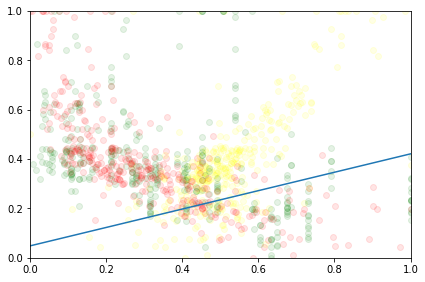

In [0]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
plt.scatter(x=train_x['RM'],y=train_y, color = ('yellow'),alpha=0.1)
plt.scatter(x=train_x['NOX'],y=train_y, color = ('green'),alpha=0.1)
plt.scatter(x=train_x['LSTAT'],y=train_y, color = ('red'),alpha=0.1)
plt.plot(lr.predict(test_x))
plt.show()